In [1]:
##This is to plot the aF collection experiments
#Setting matplotlib to be inline
%matplotlib inline

#Importing the necessary libraries
from os import listdir
from os.path import isfile, join

import re
import csv

import pandas as pd

from pylab import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
###
#These are functions to be used here.
###
##Function to change bar plot's bar width.
def change_barwidth(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [3]:
aFcollect = {'Sample': ['Empty', 'SACE STE6', 'YALI STE6'],
            'aFexport': [0.46, 4.19, 2.11]}
plotData = pd.DataFrame(data=aFcollect)
print(plotData)

      Sample  aFexport
0      Empty      0.46
1  SACE STE6      4.19
2  YALI STE6      2.11


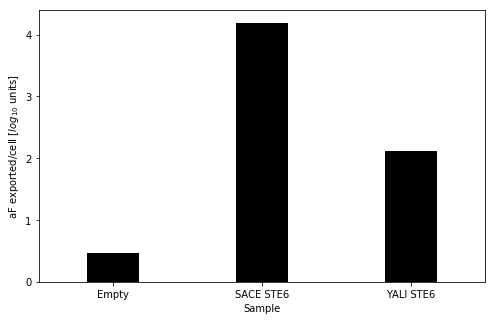

In [4]:
##Plotting the data.
figure(figsize=(8,5))
ax1 = sns.barplot(x="Sample", y="aFexport", data=plotData, color="black")
ax1.yaxis.set_ticks(np.arange(0, 5, 1));
ax1.set_ylabel('aF exported/cell [$log_{10}$ units]')
change_barwidth(ax1, .35)

#savefig('aF-collection_180424.pdf', dpi=300, transparent=True)

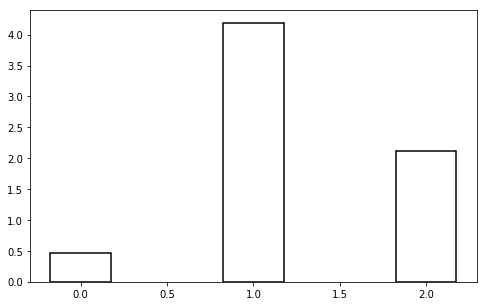

In [5]:
##Plotting the data.
figure(figsize=(8,5))
ax1 = plt.bar(range(3), list(plotData['aFexport']), width=0.35, align='center', color="white", edgecolor="black", linewidth=1.5)
#ax1.yaxis.set_ticks(np.arange(0, 5, 1));
#ax1.set_ylabel('aF exported/cell [$log_{10}$ units]')
#change_barwidth(ax1, .35)

#savefig('aF-collection_test_180424.pdf', dpi=300, transparent=True)

In [6]:
print(list(range(3)))
print(list(plotData['aFexport']))

[0, 1, 2]
[0.46, 4.19, 2.11]


In [7]:
##From Experiment done on [150513], as in the Analysis.xlsx file in my Analysis folder. The Expression data is the normalized [EGFP/OD600] signal 
##from the Timecourse sheet of the same excel file.
aFcollect_150513 = {'Sample': ['Empty', 'SACE STE6', 'KLPO STE6', 'KLLA STE6', 'CAAL HST6', 'KOPA STE6', 'YALI STE6', 'SCPO MAM1'],
                   'aFexport': [0.81, 4.17, 3.53, 3.55, 3.29, 0.88, 2.07, 0.84],
                   'expr': [0.00, 1.00, 0.74, 0.97, 0.50, 0.48, 0.89, 0.32]}
plotData_150513 = pd.DataFrame(data=aFcollect_150513)
print(plotData_150513)

      Sample  aFexport  expr
0      Empty      0.81  0.00
1  SACE STE6      4.17  1.00
2  KLPO STE6      3.53  0.74
3  KLLA STE6      3.55  0.97
4  CAAL HST6      3.29  0.50
5  KOPA STE6      0.88  0.48
6  YALI STE6      2.07  0.89
7  SCPO MAM1      0.84  0.32


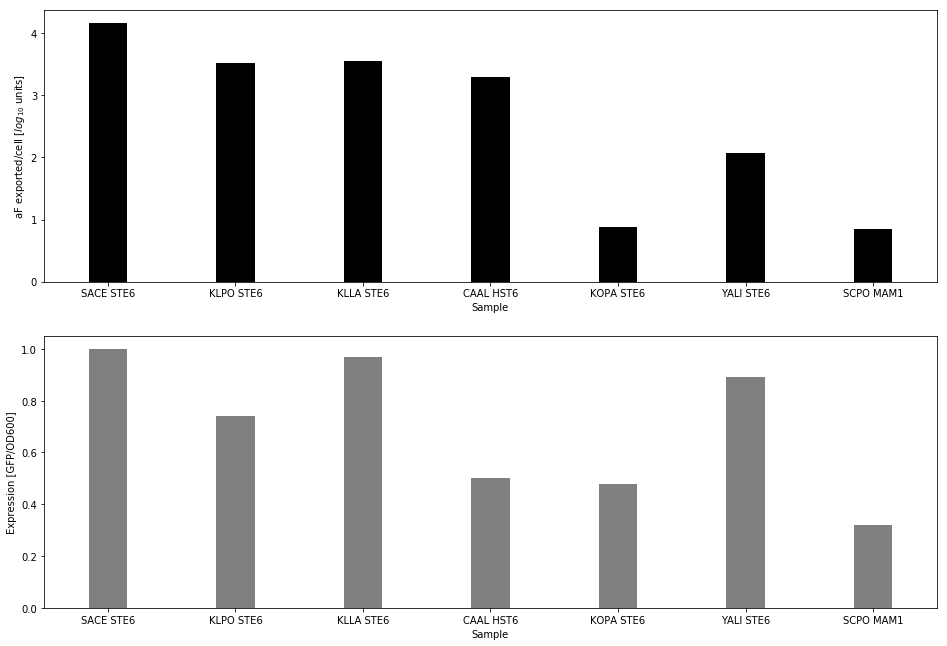

In [8]:
##Plotting the data.
figure(figsize=(16,11))
ax2 = subplot(211)
ax2 = sns.barplot(x="Sample", y="aFexport", data=plotData_150513[1:], color="black")
ax2.yaxis.set_ticks(np.arange(0, 5, 1));
ax2.set_ylabel('aF exported/cell [$log_{10}$ units]')
change_barwidth(ax2, .3)

ax3 = subplot(212)
ax3 = sns.barplot(x="Sample", y="expr", data=plotData_150513[1:], color="grey")
ax3.yaxis.set_ticks(np.arange(0, 1.1, 0.2));
ax3.set_ylabel('Expression [GFP/OD600]')
change_barwidth(ax3, .3)
#savefig('aF-collection_150513.pdf', dpi=300, transparent=True)

In [9]:
##From Experiment done on [150513], as in the Analysis.xlsx file in my Analysis folder. The Expression data is the normalized [EGFP/OD600] signal 
##from the Timecourse sheet of the same excel file.
aFcollect_150513_150606_150609 = {'Sample': ['Empty', 'Empty', 'Empty', 'SACE STE6', 'SACE STE6', 'SACE STE6', 'KLPO STE6', 'KLLA STE6', 'CAAL HST6', 'CAAL HST6', 'CAAL HST6', 'KOPA STE6', 'YALI STE6', 'YALI STE6', 'YALI STE6', 'SCPO MAM1'],
                   'aFexport': [0.81, 0.82, 0.90, 4.17, 3.53, 4.15, 3.53, 3.55, 3.29, 3.21, 3.57, 0.88, 2.07, 2.03, 2.07, 0.84],
                   'expr': [0.00, float('NaN'), float('NaN'), 1.00, float('NaN'), float('NaN'), 0.74, 0.97, 0.50, float('NaN'), float('NaN'), 0.48, 0.89, float('NaN'), float('NaN'), 0.32]}
plotData_150513_150606_150609 = pd.DataFrame(data=aFcollect_150513_150606_150609)
print(plotData_150513_150606_150609)

       Sample  aFexport  expr
0       Empty      0.81  0.00
1       Empty      0.82   NaN
2       Empty      0.90   NaN
3   SACE STE6      4.17  1.00
4   SACE STE6      3.53   NaN
5   SACE STE6      4.15   NaN
6   KLPO STE6      3.53  0.74
7   KLLA STE6      3.55  0.97
8   CAAL HST6      3.29  0.50
9   CAAL HST6      3.21   NaN
10  CAAL HST6      3.57   NaN
11  KOPA STE6      0.88  0.48
12  YALI STE6      2.07  0.89
13  YALI STE6      2.03   NaN
14  YALI STE6      2.07   NaN
15  SCPO MAM1      0.84  0.32


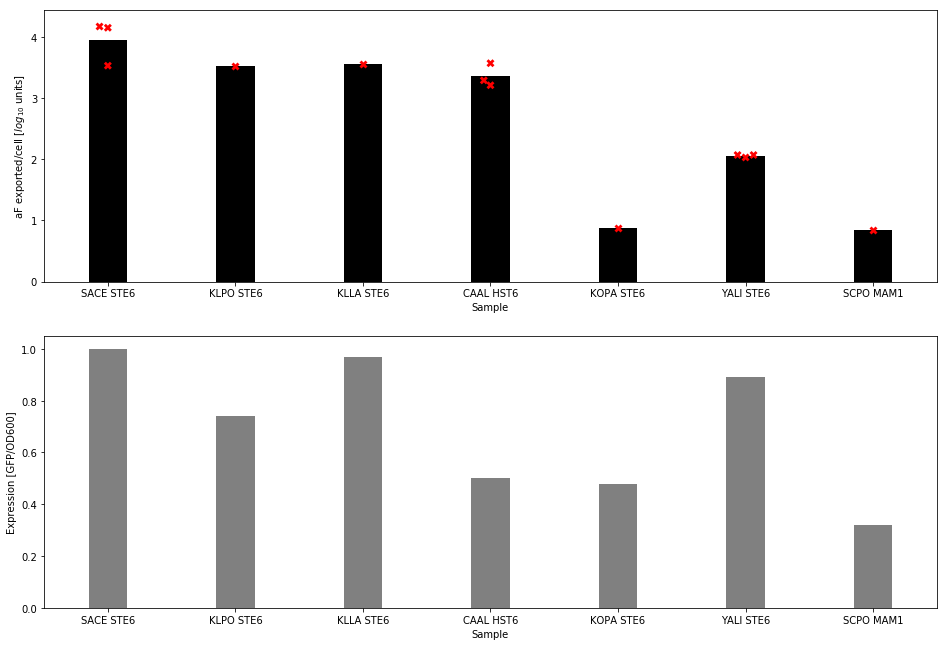

In [10]:
##Plotting the data.
figure(figsize=(16,11))
ax2 = subplot(211)
ax2 = sns.barplot(x="Sample", y="aFexport", data=plotData_150513_150606_150609[3:], color="black", ci=None)
ax4 = sns.swarmplot(x="Sample", y="aFexport", data=plotData_150513_150606_150609[3:], color="red", size=8, marker='X')
ax2.yaxis.set_ticks(np.arange(0, 5, 1));
ax2.set_ylabel('aF exported/cell [$log_{10}$ units]')
change_barwidth(ax2, .3)

ax3 = subplot(212)
ax3 = sns.barplot(x="Sample", y="expr", data=plotData_150513_150606_150609[3:], color="grey")
ax3.yaxis.set_ticks(np.arange(0, 1.1, 0.2));
ax3.set_ylabel('Expression [GFP/OD600]')
change_barwidth(ax3, .3)
#savefig('aF-collection_150513-150606-150609.pdf', dpi=300, transparent=True)

In [3]:
##I am going to import the data from the 191102 aF-collection/Spot assay experiment. I repeated the Sace and Caal spot assays since I noticed some evaporation while
##plating in the first round.
plotData_191124 = pd.read_csv("./aFcollect_191102-expt_200110.csv")
plotData_191124.head()

,Replicate,Sample,Well,Expr,aFcollect,aFcollect_unclear
0,Rep1,Empty,A1,0.00,0.88,0.88
1,Rep2,Empty,B1,0.00,0.88,0.88
2,Rep3,Empty,C1,0.00,0.88,0.88
3,Rep1,EGFP,A2,0.43,0.81,0.81
4,Rep2,EGFP,B2,0.43,0.82,0.82


(-0.02, 1.1090406366192513)

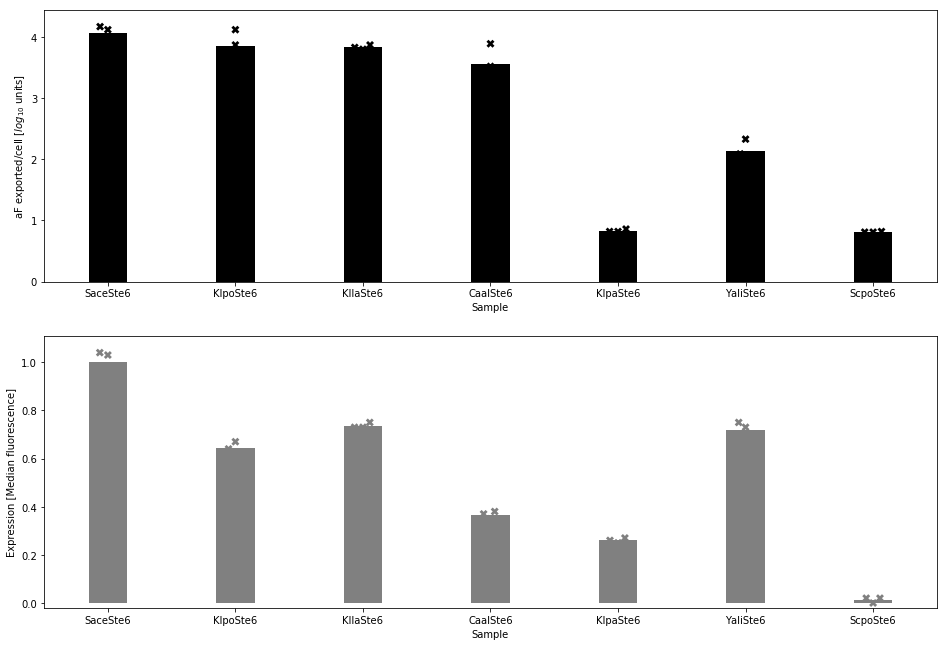

In [4]:
##Plotting the data
fig_file = './Figure1.csv'
#print(fig_file)
with open(fig_file, mode='r', encoding='utf-8-sig') as infile:
    reader = csv.reader(infile);
    plotSamples = [rows[0] for rows in reader];
#print(plotSamples[0])
#print(plotData[plotData.Sample.isin([plotSamples[0]])])

#print(plotSamples)
plotDataFig1 = pd.DataFrame()
for label in plotSamples:
    plotDataFig1 = plotDataFig1.append(plotData_191124.groupby(['Sample']).get_group(label));
#print(plotData.groupby(['Sample']).get_group(plotSamples[0]))
#print(plotDataFig1)

figure(figsize=(16,11))
ax2 = subplot(211)
ax2 = sns.barplot(x="Sample", y="aFcollect", data=plotDataFig1, color="black", ci=None)
ax4 = sns.swarmplot(x="Sample", y="aFcollect", data=plotDataFig1, color="black", size=8, marker='X')
ax2.yaxis.set_ticks(np.arange(0, 5, 1));
ax2.set_ylabel('aF exported/cell [$log_{10}$ units]')
change_barwidth(ax2, .3)

ax3 = subplot(212)
ax3 = sns.barplot(x="Sample", y="Expr", data=plotDataFig1, color="grey", ci=None)
ax4 = sns.swarmplot(x="Sample", y="Expr", data=plotDataFig1, color="grey", size=8, marker='X')
ax3.yaxis.set_ticks(np.arange(0, 1.1, 0.2));
ax3.set_ylabel('Expression [Median fluorescence]')
change_barwidth(ax3, .3)
ax3.set_ylim(bottom=-0.02)
#plt.tight_layout()
#savefig('aF-collection_191102_191126.pdf', dpi=300, transparent=True)

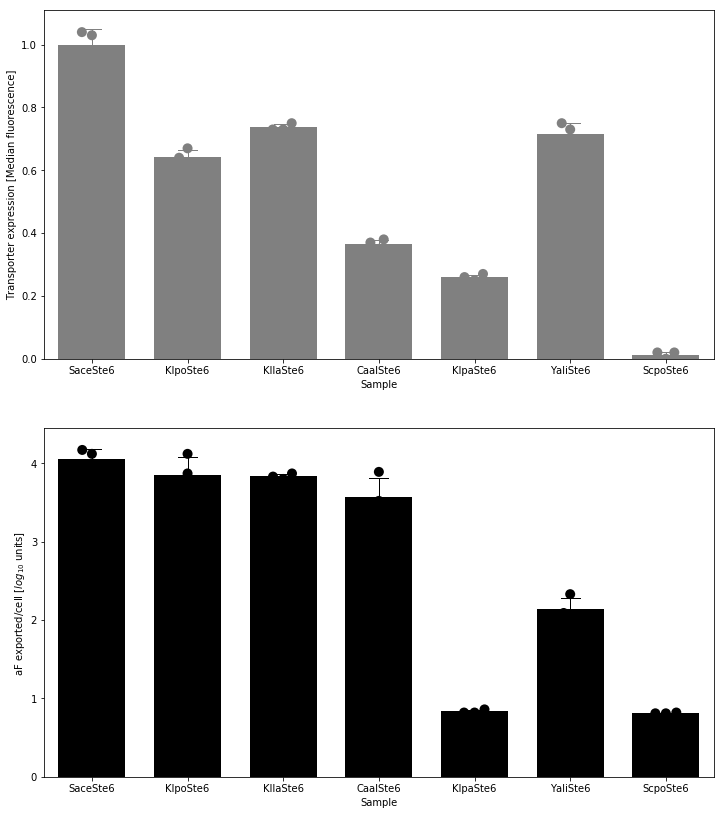

In [5]:
##Plotting the data
fig_file = './Figure1.csv'
#print(fig_file)
with open(fig_file, mode='r', encoding='utf-8-sig') as infile:
    reader = csv.reader(infile);
    plotSamples = [rows[0] for rows in reader];
#print(plotSamples[0])
#print(plotData[plotData.Sample.isin([plotSamples[0]])])

#print(plotSamples)
plotDataFig1 = pd.DataFrame()
for label in plotSamples:
    plotDataFig1 = plotDataFig1.append(plotData_191124.groupby(['Sample']).get_group(label));
#print(plotData.groupby(['Sample']).get_group(plotSamples[0]))
#print(plotDataFig1)

figure(figsize=(12,14.1))
ax3 = subplot(211)
ax3 = sns.barplot(x="Sample", y="Expr", data=plotDataFig1, color="grey", ci="sd", errwidth=1, errcolor="grey", capsize=0.2)
ax3 = sns.swarmplot(x="Sample", y="Expr", data=plotDataFig1, color="grey", size=10, marker='o')
ax3.yaxis.set_ticks(np.arange(0, 1.1, 0.2));
ax3.set_ylabel('Transporter expression [Median fluorescence]')
change_barwidth(ax3, .7)
ax3.set_ylim(bottom=-0.0)

ax2 = subplot(212)
ax2 = sns.barplot(x="Sample", y="aFcollect", data=plotDataFig1, color="black", ci="sd", errwidth=1, errcolor="black", capsize=0.2)
ax2 = sns.swarmplot(x="Sample", y="aFcollect", data=plotDataFig1, color="black", size=10, marker='o')
ax2.yaxis.set_ticks(np.arange(0, 5, 1));
ax2.set_ylabel('aF exported/cell [$log_{10}$ units]')
change_barwidth(ax2, .7)
#plt.tight_layout()
#savefig('aF-collection_with-SD_191102_191228.pdf', dpi=300, transparent=True)

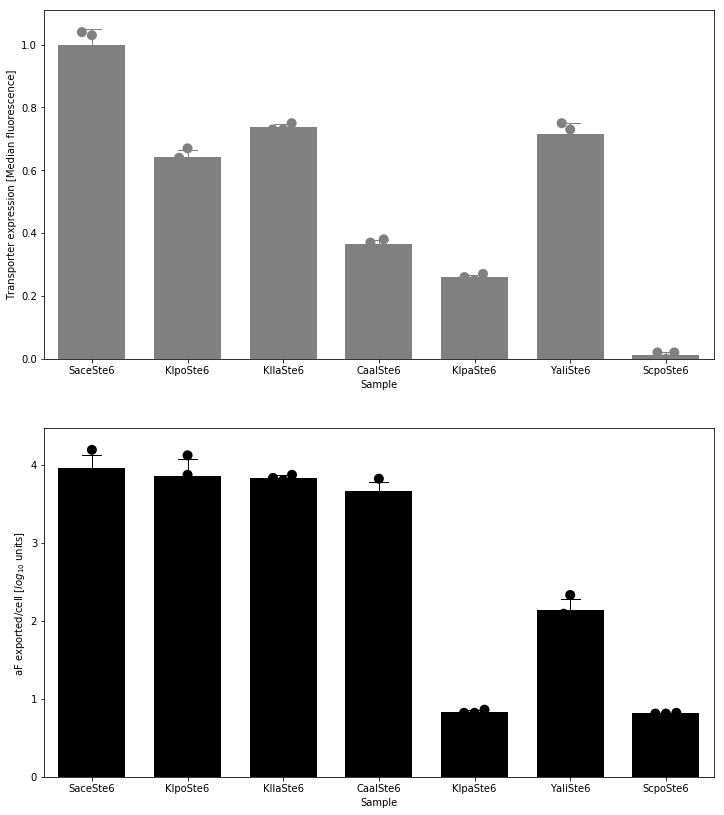

In [7]:
##Plotting the data
fig_file = './Figure1.csv'
#print(fig_file)
with open(fig_file, mode='r', encoding='utf-8-sig') as infile:
    reader = csv.reader(infile);
    plotSamples = [rows[0] for rows in reader];
#print(plotSamples[0])
#print(plotData[plotData.Sample.isin([plotSamples[0]])])

#print(plotSamples)
plotDataFig1 = pd.DataFrame()
for label in plotSamples:
    plotDataFig1 = plotDataFig1.append(plotData_191124.groupby(['Sample']).get_group(label));
#print(plotData.groupby(['Sample']).get_group(plotSamples[0]))
#print(plotDataFig1)

figure(figsize=(12,14.1))
ax3 = subplot(211)
ax3 = sns.barplot(x="Sample", y="Expr", data=plotDataFig1, color="grey", ci="sd", errwidth=1, errcolor="grey", capsize=0.2)
ax3 = sns.swarmplot(x="Sample", y="Expr", data=plotDataFig1, color="grey", size=10, marker='o')
ax3.yaxis.set_ticks(np.arange(0, 1.1, 0.2));
ax3.set_ylabel('Transporter expression [Median fluorescence]')
change_barwidth(ax3, .7)
ax3.set_ylim(bottom=-0.0)

ax2 = subplot(212)
ax2 = sns.barplot(x="Sample", y="aFcollect_unclear", data=plotDataFig1, color="black", ci="sd", errwidth=1, errcolor="black", capsize=0.2)
ax2 = sns.swarmplot(x="Sample", y="aFcollect_unclear", data=plotDataFig1, color="black", size=10, marker='o')
ax2.yaxis.set_ticks(np.arange(0, 5, 1));
ax2.set_ylabel('aF exported/cell [$log_{10}$ units]')
change_barwidth(ax2, .7)
#plt.tight_layout()
#savefig('aF-collection_with-SD_191102_200110.pdf', dpi=300, transparent=True)

In [7]:
##From Experiment done on [150513], as in the Analysis.xlsx file in my Analysis folder. The Expression data is the normalized [EGFP/OD600] signal 
##from the Timecourse sheet of the same excel file.
aFcollect_180424 = {'Sample': ['Empty', 'Empty', 'ScSTE6', 'ScSTE6', 'YlSTE6', 'YlSTE6', 'YlSTE6[TM4-6/B11]', 'YlSTE6[TM4-6/B11]', 'YlSTE6[TM4-6/C9]', 'YlSTE6[TM4-6/C9]',
                              'YlSTE6[TM10-12/D1]', 'YlSTE6[TM10-12/D1]', 'YlSTE6[TM10-12/D11]', 'YlSTE6[TM10-12/D11]'],
                   'aFexport': [0.46, 0.46, 4.34, 4.04, 1.93, 2.29, 3.50, 3.47, 3.20, 3.14, 3.17, 3.11, 3.06, 3.08]}
plotData_180424 = pd.DataFrame(data=aFcollect_180424)
print(plotData_180424)

                 Sample  aFexport
0                 Empty      0.46
1                 Empty      0.46
2                ScSTE6      4.34
3                ScSTE6      4.04
4                YlSTE6      1.93
5                YlSTE6      2.29
6     YlSTE6[TM4-6/B11]      3.50
7     YlSTE6[TM4-6/B11]      3.47
8      YlSTE6[TM4-6/C9]      3.20
9      YlSTE6[TM4-6/C9]      3.14
10   YlSTE6[TM10-12/D1]      3.17
11   YlSTE6[TM10-12/D1]      3.11
12  YlSTE6[TM10-12/D11]      3.06
13  YlSTE6[TM10-12/D11]      3.08


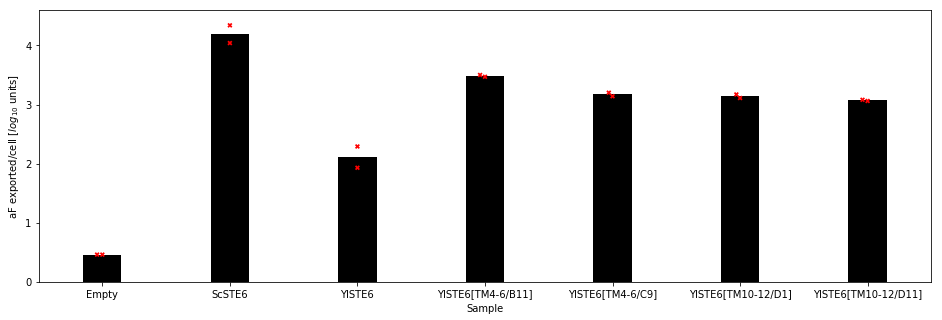

In [28]:
##Plotting the data.
figure(figsize=(16,5))
ax4 = sns.barplot(x="Sample", y="aFexport", data=plotData_180424, color="black", ci=None)
ax4 = sns.swarmplot(x="Sample", y="aFexport", data=plotData_180424, color="red", marker='X')
ax4.yaxis.set_ticks(np.arange(0, 5, 1));
ax4.set_ylabel('aF exported/cell [$log_{10}$ units]')
#plt.xticks(rotation=70)
change_barwidth(ax4, .3)

#savefig('aF-collection_all-mutants_180424.pdf', dpi=300, transparent=True)